# Forecasting Exercises - Solutions
This exercise walks through a SARIMA prediction and forecast similar to the one done on the Mauna Loa CO₂ dataset.<br>
This time we're using a seasonal time series of California Hospitality Industry Employees.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [1]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('D:/ML-Datasets/Udemy-TimeSeries/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


So <tt>df</tt> has 348 records and one column. The data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.

### 1. Plot the source data
Create a line chart of the dataset. Optional: add a title and y-axis label.

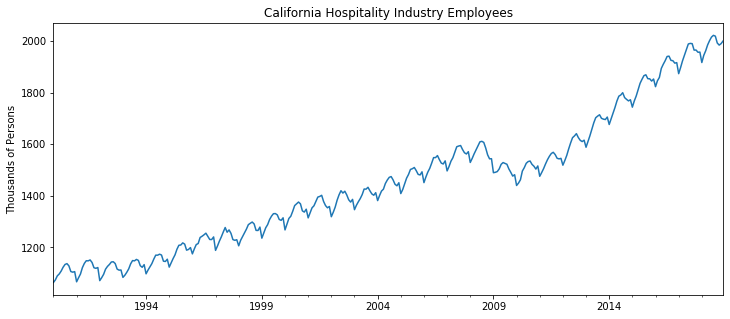

In [2]:
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel='' # we don't really need a label here

ax = df['Employees'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### 2. Run an ETS Decomposition
Use an 'additive' model.

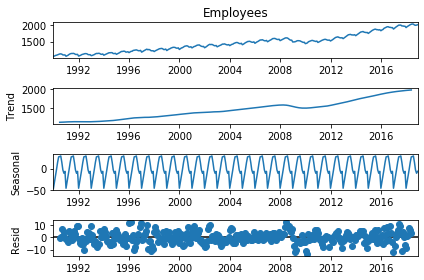

In [3]:
result = seasonal_decompose(df['Employees'], model='add')
result.plot();

### 3. Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot of combinations to evaluate.

In [4]:
auto_arima(df['Employees'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.234
Date:                              Sat, 11 Apr 2020   AIC                           2210.468
Time:                                      13:55:39   BIC                           2237.413
Sample:                                           0   HQIC                          2221.196
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0005      0.006      0.086      0.931      -0.011       0.012
ar.L1          0.9234      0.046     20.260      0.000       0.834       1.013
ma.L1         -0.9435      0.070    -13.507      0.000      -1.080      -0.807
ma.L2          0.1292      0.060      2.161      0.031       0.012       0.246
ar.S.L12       0.9972      0.002    636.245      0.000       0.994       1.000
ma.S.L12      -0.7499      0.043    -17.379      0.000      -0.834      -0.665
sigma2        29.2986      1.717     17.066      0.000      25.934      32.663
===================================================================================
Ljung-Box (Q):                       31.57   Jarque-Bera (JB):                67.19
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

You should see a recommended ARIMA Order of (1,1,2) combined with a seasonal order of (1,0,1,12).
### 4. Split the data into train/test sets
Set one year (12 records) for testing. There is more than one way to do this!

In [5]:
# DON'T WRITE HERE
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

### 5. Fit a SARIMA(0,1,0)(2,0,0,12) model to the training set

In [6]:
# DON'T WRITE HERE
model = SARIMAX(train['Employees'],order=(1,1,2),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Sat, 11 Apr 2020   AIC                           2128.116
Time:                                      13:58:07   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9240      0.044     21.177      0.000       0.839       1.010
ma.L1         -0.9583      0.070    -13.600      0.000      -1.096      -0.820
ma.L2          0.1497      0.061      2.453      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    729.850      0.000       0.995       1.000
ma.S.L12      -0.7517      0.044    -17.147      0.000      -0.838      -0.666
sigma2        28.7663      1.684     17.080      0.000      25.465      32.067
===================================================================================
Ljung-Box (Q):                       29.89   Jarque-Bera (JB):                73.33
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Obtain predicted values

In [7]:
# DON'T WRITE HERE
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,1,2)(1,0,1,12) Predictions')

### 7. Plot predictions against known values
Optional: add a title and y-axis label.

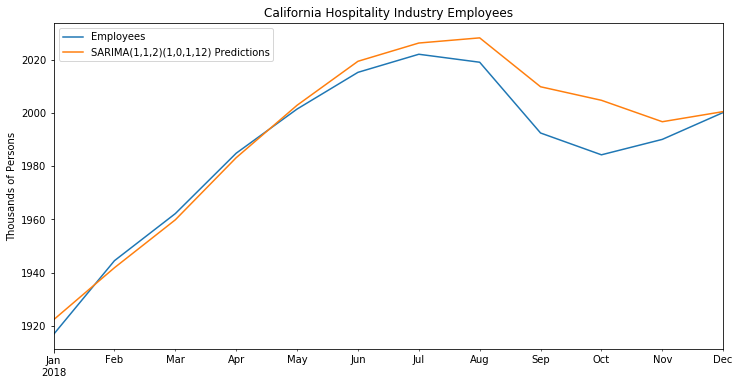

In [8]:
# DON'T WRITE HERE
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = test['Employees'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### 8. Evaluate the Model using MSE and RMSE
You can run both from the same cell if you want.

In [9]:
# DON'T WRITE HERE
error1 = mean_squared_error(test['Employees'], predictions)
error2 = rmse(test['Employees'], predictions)
print(f'SARIMA(1,1,2)(1,0,1,12) MSE Error: {error1:11.10}')
print(f'SARIMA(1,1,2)(1,0,1,12) RMSE Error: {error2:11.10}')

SARIMA(1,1,2)(1,0,1,12) MSE Error:  77.7160047
SARIMA(1,1,2)(1,0,1,12) RMSE Error: 8.815668137


### 9. Retrain the model on the full data and forecast one year into the future

In [10]:
# DON'T WRITE HERE
model = SARIMAX(df['Employees'],order=(1,1,2),seasonal_order=(1,0,1,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(1,1,2)(1,0,1,12) Forecast')

### 10. Plot the forecasted values alongside the original data
Optional: add a title and y-axis label.

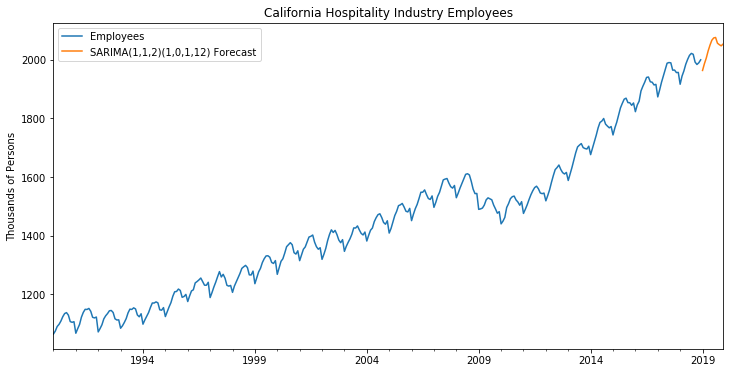

In [11]:
# DON'T WRITE HERE
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = df['Employees'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);